# Центральная предельная теорема

## Моё любимое распределение - распределение Парето, т.к. оно описывает распределение благосостояния.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

## Сгенерируем выборку объёмом 1000

In [4]:
k = 4.0 # 
xm = 3.0 # коэффициент сдвига

distributionRv = sts.pareto(k, loc=0, scale=xm)

distributionSample = distributionRv.rvs(1000)

print('Theoretical mean: ', distributionRv.mean()) 
print('Theoretical standard deviation: ', distributionRv.std()) 
                        

Theoretical mean:  4.0
Theoretical standard deviation:  1.4142135623730951


## Построим гистограмму выборки и график теоритеческой плотности распределения случайной величины

Text(0, 0.5, 'pdf')

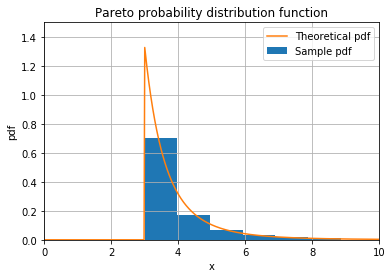

In [7]:
plt.hist(distributionSample, bins=30, density=True, label='Sample pdf')

x = np.linspace(0,20,1000)
pdf = distributionRv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([0, 10, 0, 1.5])
plt.title('Pareto probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

## Сгенерируем 1000 выборок объёма n (5, 10, 50) и построим гистограммы распределений их выборочных средних.

In [9]:
sampleNum = 1000
sampleVolume = [5, 10, 50]
distributionSamples = np.zeros( (len(sampleVolume), sampleNum) )

for i in range( len(sampleVolume) ):
    for j in range(sampleNum):
        distributionSampleTemp = np.array( sts.pareto.rvs(k, loc=0, scale=xm, size=sampleVolume[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionSamples[i, j] = distributionSampleTempMean
        
print(distributionSamples)

[[3.93259961 3.36228968 4.1404714  ... 3.75214051 3.43390029 3.72369748]
 [3.63468507 3.37959216 3.86994787 ... 4.99462764 3.78432358 3.67617099]
 [4.24400399 3.99013743 3.90671342 ... 3.78829539 3.90574236 4.04660689]]


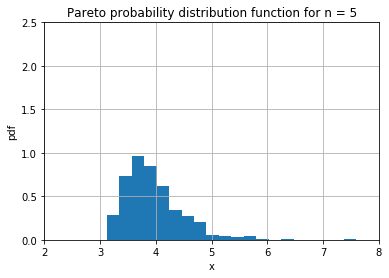

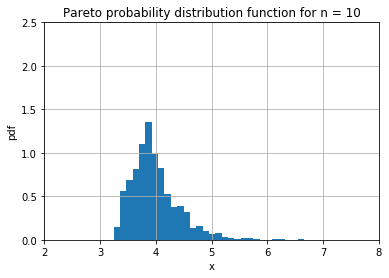

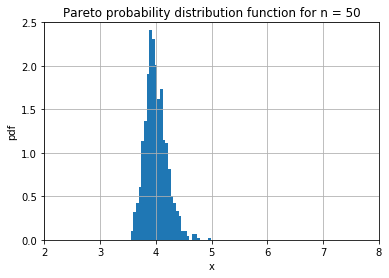

In [11]:
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()

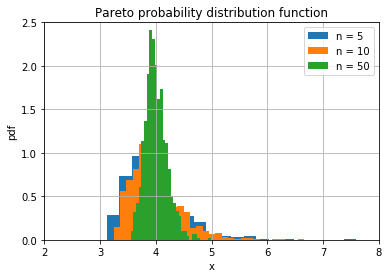

In [12]:
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

## Вычислим параметры нормальных распределений. Согласно центральной предельной теореме, ими приближается распределение выборочных средних.

In [14]:
distributionSampleMean = k * xm / (k - 1)
distributionSampleVariance = np.zeros( len(sampleVolume) )
for i in range( len(sampleVolume) ):
    distributionSampleVariance[i] = xm**2 * k / ( (k - 1)**2 * (k - 2) ) / sampleVolume[i]
    
print('Mean: ' + str(distributionSampleMean)) 
for i in range( len(sampleVolume) ):
    print('Dispersion for n = ' + str(sampleVolume[i]) + ': ' + str(distributionSampleVariance[i])) 

Mean: 4.0
Dispersion for n = 5: 0.4
Dispersion for n = 10: 0.2
Dispersion for n = 50: 0.04


## Нарисуем плотность соответствующего нормального распределения поверх каждой гистограммы.

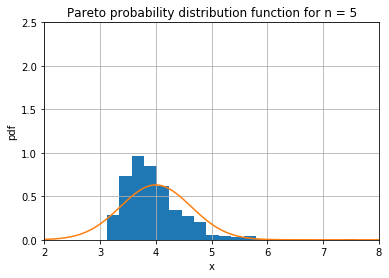

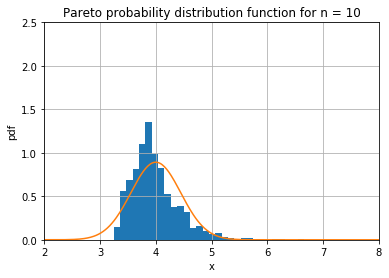

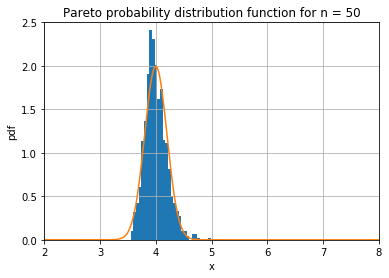

In [16]:
for i in range( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function for n = ' + str(sampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()

In [ ]:
for i in xrange( len(sampleVolume) ):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(sampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)